# Building Neural Network using PyTorch

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
batch_size = 64
num_epochs = 10
learning_rate = 0.01

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Mean and Std of MNIST dataset
])

In [4]:
train_dataset = datasets.MNIST(root='.', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='.', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [5]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.layer1 = nn.Linear(28*28, 512)
        self.layer2 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 28*28) # Flatten the image
        x = F.relu(self.layer1(x)) # ReLU activation
        x = self.layer2(x)
        return x

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Network().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [7]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, 1)
    return torch.sum(preds == labels).item() / len(labels)

def train(model, device, train_loader, criterion, optimizer, epoch):
    model.train()
    running_loss = 0.0
    running_acc = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_acc += accuracy(outputs, labels)
        if (i + 1) % 200 == 0:
            print(f'Epoch {epoch}, Batch {i+1}, Loss: {running_loss / 200:.4f}, Accuracy: {running_acc / 200:.4f}')
            running_loss = 0.0
            running_acc = 0.0

def test(model, device, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    test_acc = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            test_acc += accuracy(outputs, labels)
    print(f'Test Loss: {test_loss / len(test_loader):.4f}, Test Accuracy: {test_acc / len(test_loader):.4f}')

Epoch 1, Batch 200, Loss: 1.0988, Accuracy: 0.7607
Epoch 1, Batch 400, Loss: 0.4896, Accuracy: 0.8759
Epoch 1, Batch 600, Loss: 0.3944, Accuracy: 0.8926
Epoch 1, Batch 800, Loss: 0.3541, Accuracy: 0.9015
Test Loss: 0.3101, Test Accuracy: 0.9120
Epoch 2, Batch 200, Loss: 0.3141, Accuracy: 0.9095
Epoch 2, Batch 400, Loss: 0.2990, Accuracy: 0.9160
Epoch 2, Batch 600, Loss: 0.2817, Accuracy: 0.9177
Epoch 2, Batch 800, Loss: 0.2705, Accuracy: 0.9252
Test Loss: 0.2506, Test Accuracy: 0.9315
Epoch 3, Batch 200, Loss: 0.2462, Accuracy: 0.9319
Epoch 3, Batch 400, Loss: 0.2390, Accuracy: 0.9319
Epoch 3, Batch 600, Loss: 0.2412, Accuracy: 0.9337
Epoch 3, Batch 800, Loss: 0.2342, Accuracy: 0.9345
Test Loss: 0.2119, Test Accuracy: 0.9406
Epoch 4, Batch 200, Loss: 0.2210, Accuracy: 0.9383
Epoch 4, Batch 400, Loss: 0.2038, Accuracy: 0.9427
Epoch 4, Batch 600, Loss: 0.1992, Accuracy: 0.9451
Epoch 4, Batch 800, Loss: 0.1973, Accuracy: 0.9437
Test Loss: 0.1872, Test Accuracy: 0.9468
Epoch 5, Batch 200, 

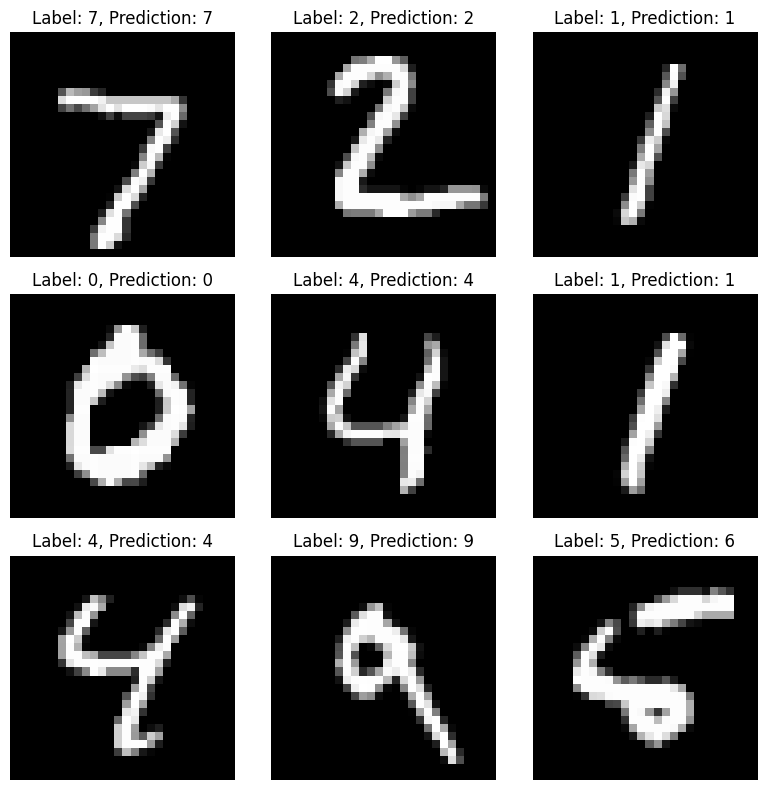

In [8]:
for epoch in range(1, num_epochs + 1):
    train(model, device, train_loader, criterion, optimizer, epoch)
    test(model, device, test_loader, criterion)

# Visualize sample images with predictions
samples, labels = next(iter(test_loader))
samples = samples.to(device)
outputs = model(samples)
_, preds = torch.max(outputs, 1)

samples = samples.cpu().numpy()
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(samples[i].squeeze(), cmap='gray')
    ax.set_title(f'Label: {labels[i]}, Prediction: {preds[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()